In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("/kaggle/input/sleep-cycle-and-productivity/sleep_cycle_productivity.csv")

In [4]:
data.head(10)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
5,2024-07-08,7439,38,Male,21.77,6.41,8.64,10,88,251,123,6.207993,1,9,7
6,2024-01-09,6463,18,Other,22.83,6.87,8.03,3,34,288,122,4.592357,7,10,9
7,2024-01-28,7278,26,Female,20.78,3.14,6.35,8,36,98,171,9.100460,3,1,3
8,2024-04-10,9110,31,Other,20.07,3.37,7.31,7,26,206,14,4.887127,3,7,1
9,2024-02-21,6116,49,Female,20.37,3.89,7.52,4,12,159,70,6.318012,6,2,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

In [6]:
data.describe()

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


In [7]:
data.isnull().sum()

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [16]:
data.columns

Index(['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time',
       'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality',
       'Exercise (mins/day)', 'Caffeine Intake (mg)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level'],
      dtype='object')

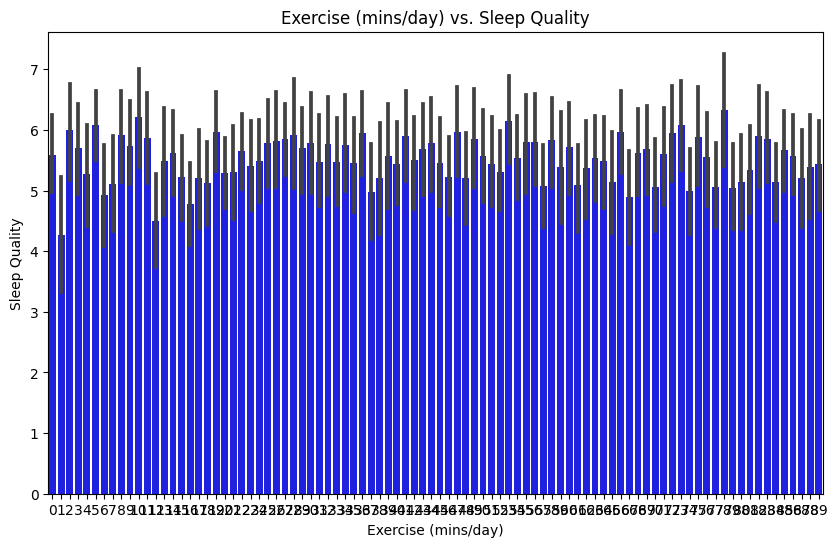

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Exercise (mins/day)', y='Sleep Quality', color='blue')
plt.title('Exercise (mins/day) vs. Sleep Quality')
plt.xlabel('Exercise (mins/day)')
plt.ylabel('Sleep Quality')
plt.show()

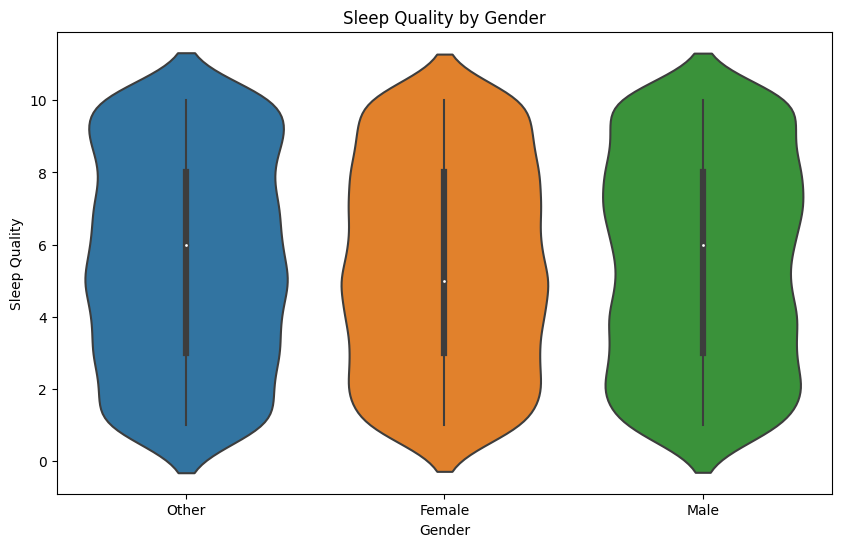

In [12]:
# Violin plot of Sleep Quality by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Gender', y='Sleep Quality')
plt.title('Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

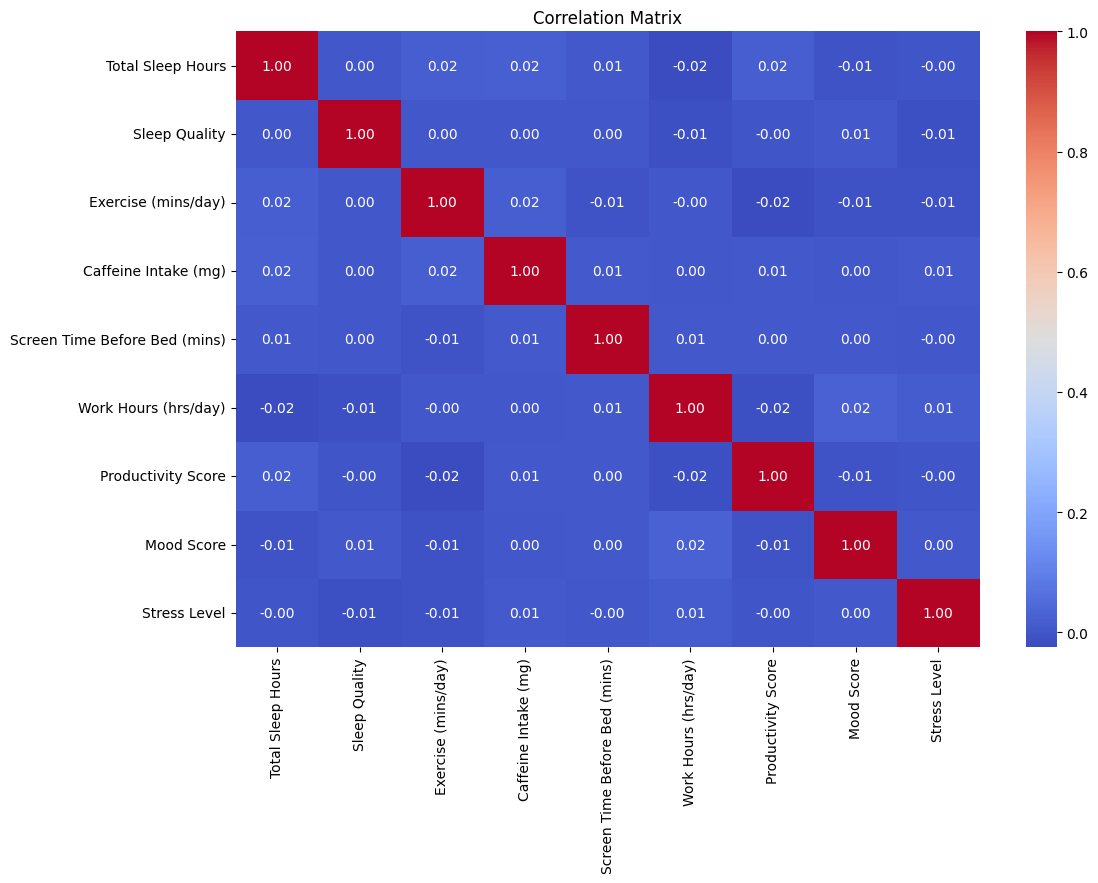

In [17]:
# Correlation matrix
cor_matrix = data[['Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 
                   'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
                   'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 
                   'Stress Level']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Define the independent variables and the dependent variable
X = data[['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
          'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 
          'Productivity Score', 'Mood Score', 'Stress Level']]
y = data['Sleep Quality']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep Quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2928
Date:                Sat, 22 Feb 2025   Prob (F-statistic):              0.969
Time:                        16:40:11   Log-Likelihood:                -12354.
No. Observations:                5000   AIC:                         2.473e+04
Df Residuals:                    4991   BIC:                         2.478e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 8.27580239403018
R^2 Score: -0.0064266906000931545


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



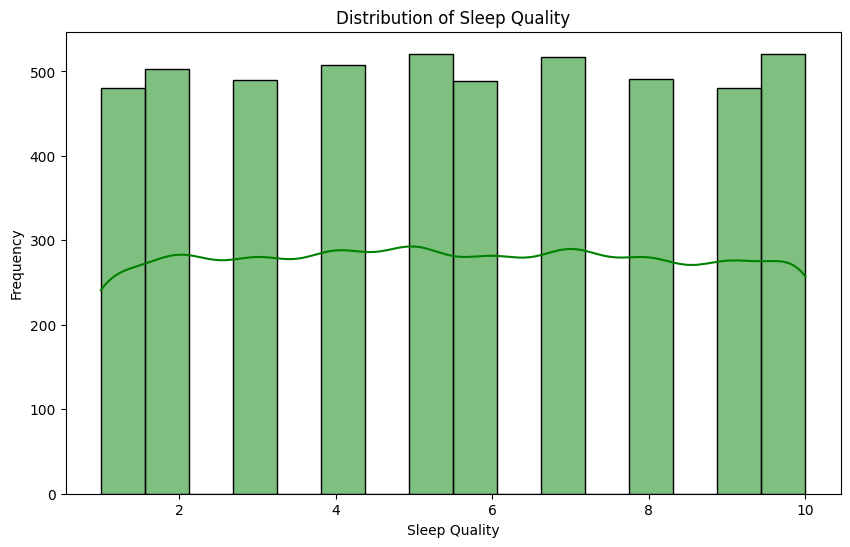

In [26]:
# Distribution plot of Sleep Quality
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Quality'], kde=True, color='green')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()

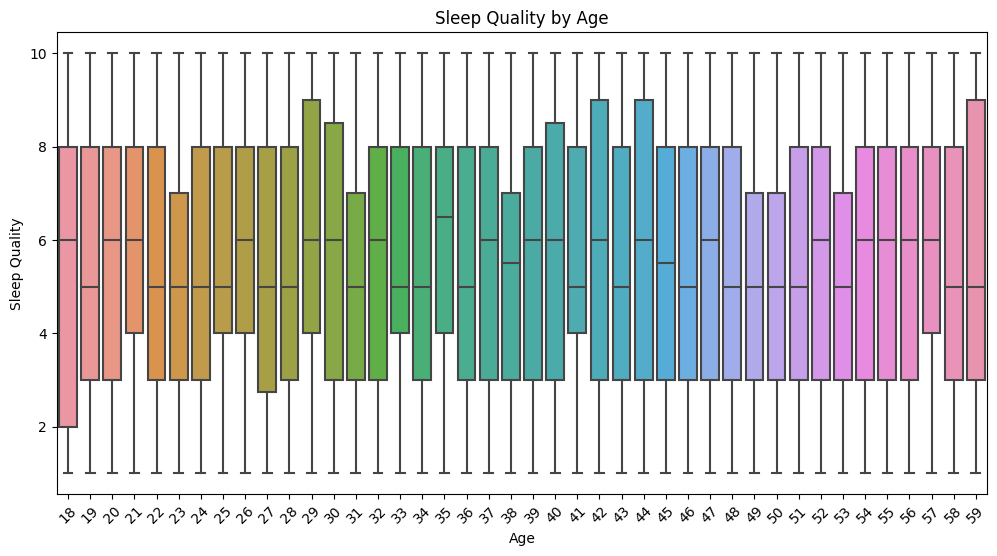

In [27]:
# Box plot of Sleep Quality by Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Age', y='Sleep Quality')
plt.title('Sleep Quality by Age')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()